In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#Loading data

In [9]:
data_no_fire = pd.read_csv("nofire.csv")
data_no_fire = data_no_fire.apply(pd.to_numeric, errors='coerce')
data_no_fire = tf.constant(data_no_fire, dtype=tf.float32)
data_no_fire = tf.reshape(data_no_fire,[1000,8,8])
data_fire = pd.read_csv("fire.csv")
data_fire = data_fire.apply(pd.to_numeric, errors='coerce')
data_fire = tf.constant(data_fire, dtype=tf.float32)
data_fire = tf.reshape(data_fire,[1000,8,8])
data = tf.concat([data_no_fire, data_fire], axis=0)

In [10]:
data=tf.reshape(data,[2000,8,8])

In [11]:
data = tf.expand_dims(data, axis=-1)  # Thêm chiều channel

In [12]:
data = tf.image.resize(data, [28, 28], method=tf.image.ResizeMethod.BILINEAR)

In [13]:
data = tf.squeeze(data, axis=-1)

In [14]:
#kiem tra co gia tri nan hay khong va tim vi tri cu the
has_nan = np.isnan(data).any()
print(f"X_train contains NaN: {has_nan}")

X_train contains NaN: False


In [15]:
#tao y train

In [16]:
labels_no_fire=np.zeros(len(data_no_fire))
labels_fire=np.ones(len(data_fire))
y_data=np.concatenate([labels_no_fire,labels_fire])
y_data=tf.constant(y_data,dtype=tf.float32)
y_data=tf.reshape(y_data, [2000,1])

In [17]:
X_data_np=data.numpy()
y_data_np=y_data.numpy()

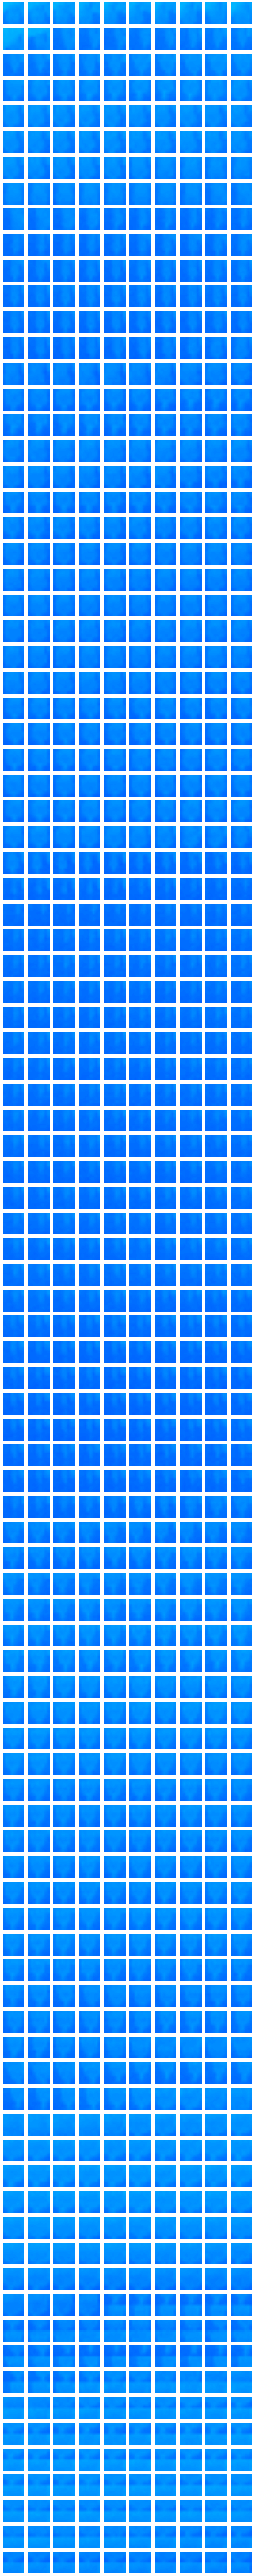

In [ ]:
# Hiển thị dữ liệu đầu vào không có cháy
# Define the custom colormap
colors = [(0, 0, 1), (0, 1, 1), (1, 1, 0), (1, 0, 0), (0.5, 0, 0.5)]  # Blue -> Cyan -> Yellow -> Red -> Purple
nodes = [0.0, 0.3, 0.6, 0.9, 1.0]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, colors)))

# Assuming X_data_np is already defined and loaded

# Create a figure with a 10x10 grid
fig, axes = plt.subplots(100, 10, figsize=(10,100))

# Plot each image in the specified range
for i in range(1000):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(X_data_np[i].reshape(28, 28), cmap=custom_cmap, interpolation='nearest', vmin=15, vmax=100)
    axes[row, col].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

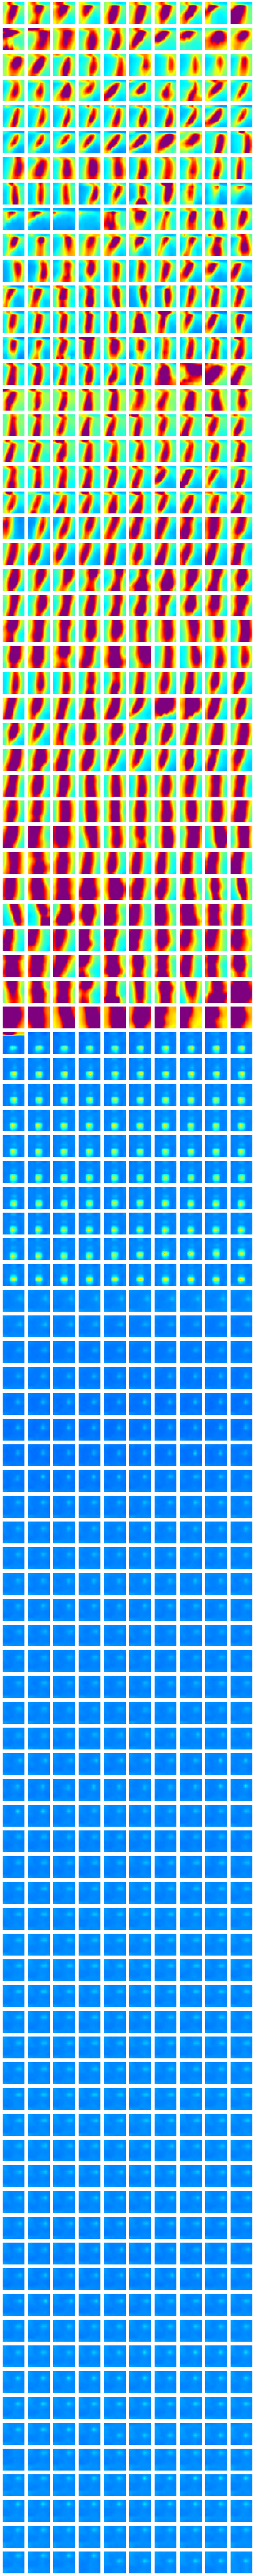

In [18]:
# Hiển thị dữ liệu đầu vào có cháy
# Define the custom colormap
colors = [(0, 0, 1), (0, 1, 1), (1, 1, 0), (1, 0, 0), (0.5, 0, 0.5)]  # Blue -> Cyan -> Yellow -> Red -> Purple
nodes = [0.0, 0.3, 0.6, 0.9, 1.0]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, colors)))

# Assuming X_data_np is already defined and loaded

# Create a figure with a 10x10 grid
fig, axes = plt.subplots(100, 10, figsize=(10,100))

# Plot each image in the specified range
for i in range(1000):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(X_data_np[1000+i].reshape(28, 28), cmap=custom_cmap, interpolation='nearest', vmin=15, vmax=100)
    axes[row, col].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_np,y_data_np,test_size=0.2,random_state=42)

In [20]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
# Định nghĩa mô hình
model = tf.keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),  # Chuyển đổi mảng 2D thành vector 1D
    Dense(128, activation='relu'),  # Lớp fully connected với 128 đơn vị và hàm kích hoạt ReLU
    Dense(64, activation='relu'),  # Lớp fully connected với 64 đơn vị và hàm kích hoạt ReLU
    Dropout(0.5),  # Dropout để giảm thiểu overfitting
    Dense(1, activation='sigmoid')  # Lớp đầu ra với 1 đơn vị và hàm kích hoạt sigmoid
])


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 1s 11ms/step - loss: 6.6027 - accuracy: 0.5578 - val_loss: 1.5004 - val_accuracy: 0.5312
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 1.1031 - accuracy: 0.5742 - val_loss: 0.6128 - val_accuracy: 0.5406
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 0.5374 - accuracy: 0.6953 - val_loss: 0.5429 - val_accuracy: 0.5719
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5349 - accuracy: 0.6898 - val_loss: 0.5120 - val_accuracy: 0.7250
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.4810 - accuracy: 0.7477 - val_loss: 0.4807 - val_accuracy: 0.7250
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.4983 - accuracy: 0.7172 - val_loss: 0.5080 - val_accuracy: 0.9344
Epoch 7/10
40/40 [==============================] - 0s 5ms/step - loss: 0.5269 - accuracy: 0.7172 - val_loss: 0.5286 - val_accuracy: 0.7219
Epoch 8/10
40/40 [=

In [23]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

13/13 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7075
Test accuracy: 0.7075


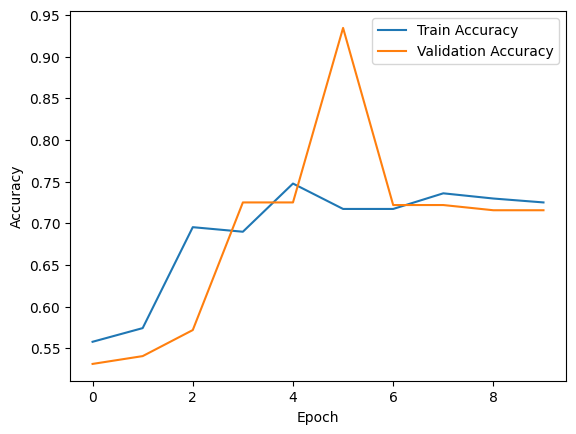

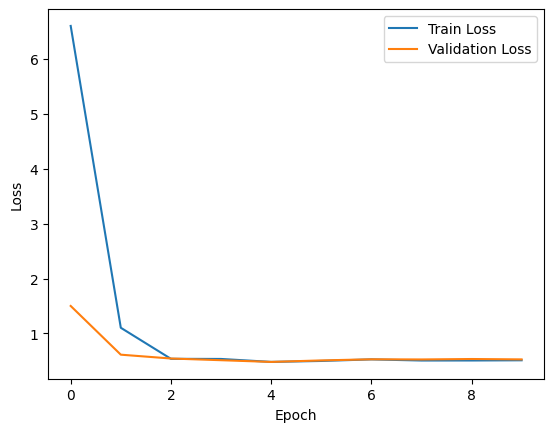

In [24]:
#Hiển thị kết quả huấn luyện
# Hiển thị kết quả huấn luyện
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step


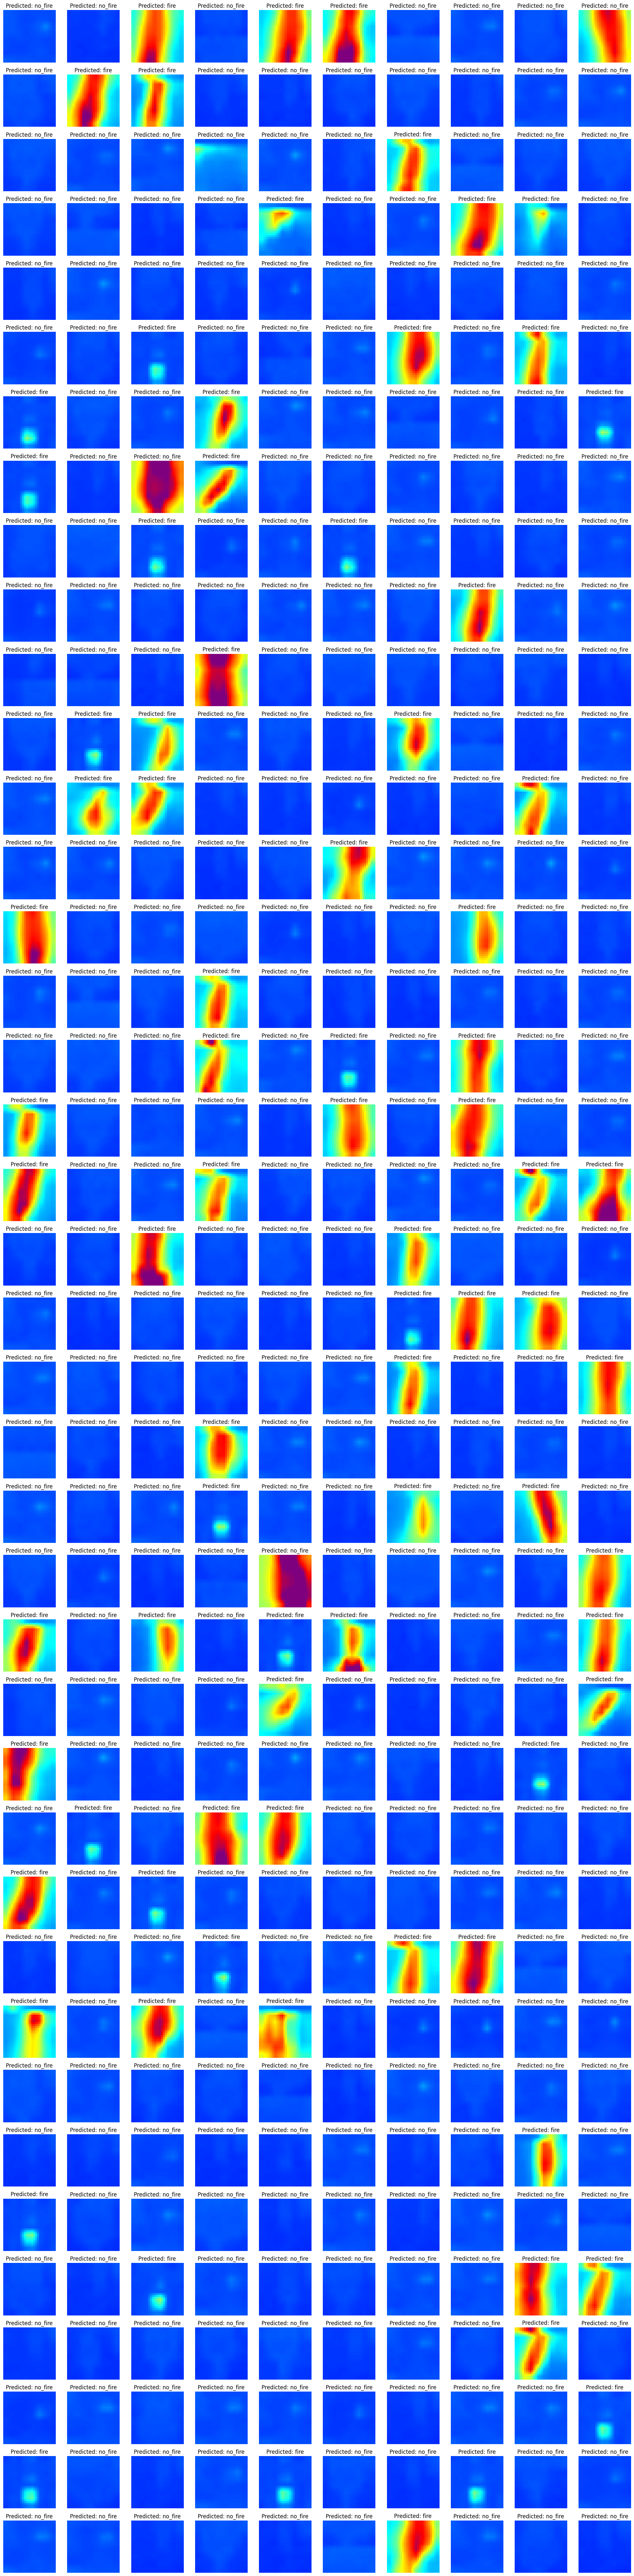

In [26]:
predictions = model.predict(X_test)

# Hiển thị một số kết quả dự đoán
colors = [(0, 0, 1), (0, 1, 1), (1, 1, 0), (1, 0, 0), (0.5, 0, 0.5)]  # Blue -> Cyan -> Yellow -> Red -> Purple
nodes = [0.0, 0.3, 0.6, 0.9, 1.0]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(nodes, colors)))

# Assuming predictions and X_test are already defined and loaded
# predictions should be the output of model.predict(X_test)

# Create a figure with a grid of subplots based on the number of images
num_images = len(X_test)
num_rows = int(num_images / 10) + 1 if num_images % 10 != 0 else int(num_images / 10)
fig, axes = plt.subplots(num_rows, 10, figsize=(20, 2 * num_rows))

# Plot each image in X_test with its prediction
for i in range(num_images):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(X_test[i].reshape(28, 28), cmap=custom_cmap, interpolation='nearest', vmin=20, vmax=120)
    axes[row, col].set_title(f'Predicted: {"fire" if predictions[i] > 0.5 else "no_fire"}')
    axes[row, col].axis('off')  # Turn off axis

# Remove empty subplots if there are any
for i in range(num_images, num_rows * 10):
    row = i // 10
    col = i % 10
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [33]:
predictions = model.predict(X_test)
print(predictions[:10])

13/13 [==============================] - 0s 3ms/step
[[0.44805452]
 [0.4253724 ]
 [0.9999916 ]
 [0.4287479 ]
 [0.9999578 ]
 [0.99999994]
 [0.42558774]
 [0.4482518 ]
 [0.4238929 ]
 [0.4733295 ]]


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 108801 (425.00 KB)
Trainable params: 108801 (425.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset():
    for _ in range(100):
        yield [
            np.random.uniform(low=0, high=256, size=(1, 28, 28)).astype(np.float32)
        ]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()
open("tflite_model_amg8833.tflite", "wb").write(tflite_model)


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


112512

In [36]:
interpreter = tf.lite.Interpreter("tflite_model_amg8833.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("input details", input_details)
print("ouput details", output_details)

input details [{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (1.0039209127426147, 0), 'quantization_parameters': {'scales': array([1.0039209], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
ouput details [{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.00390625, 0), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [37]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_data = X_test[3].reshape(1, 28, 28)
input_data = input_data.astype(np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

boxes = interpreter.get_tensor(output_details[0]['index'])[0]
print(boxes)

[107]


In [38]:
input_data

array([[[27, 27, 27, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 27, 27],
        [27, 27, 27, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 27, 27],
        [27, 27, 27, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 27, 27],
        [27, 27, 27, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 27, 27],
        [26, 26, 27, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 28, 29, 29, 29, 29, 28, 28, 27, 27],
        [26, 26, 27, 27, 28, 29, 29, 29, 28, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 28, 28, 29, 29, 29, 29, 28, 27, 27, 27],
        [26, 26, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29,
         29, 28, 28, 28, 28, 29, 29, 28, 28, 27, 27, 27],
        [26, 26, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29,
         2